#### Import all of our dependencies

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os,sys
import random
import skimage.io
from   skimage import data, transform ,color
from   sklearn.decomposition import PCA
from   mst_clustering import MSTClustering
import seaborn as sns; sns.set()

#### Load Data Function

This function traverses a set of directories scanning for a particular file type.

In [14]:
def load_data(data_directory,file_type):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(file_type)]
        for f in file_names:
            images.append(color.rgb2gray(skimage.data.imread(f)))
            labels.append(int(d))
    return images, labels

#### Plot Minimum Spanning Tree

In [13]:
import warnings; warnings.filterwarnings('ignore', message='elementwise')

def plot_mst(model, cmap='rainbow'):
    """Utility code to visualize a minimum spanning tree"""
    X = model.X_fit_
    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)
    for axi, full_graph, colors in zip(ax, [True, False], ['lightblue', model.labels_]):
        segments = model.get_graph_segments(full_graph=full_graph)
        axi.plot(segments[0], segments[1], '-k', zorder=1, lw=1)
        axi.scatter(X[:, 0], X[:, 1], c=colors, cmap=cmap, zorder=2)
        axi.axis('tight')
    
    ax[0].set_title('Full Minimum Spanning Tree', size=16)
    ax[1].set_title('Trimmed Minimum Spanning Tree', size=16)

#### Start loading and setting up data...

In [17]:
ROOT_PATH = "."
colors = []

# limit sample images to thin out plot
samples = 500
empty_data_directory = "/code/pkLot/PKLotSegmented/test_data/Empty"
occupied_data_directory = "/code/pkLot/PKLotSegmented/test_data/Occupied"

# Load up image and labels lists
print("Loading empty space images ...")
images, labels = load_data(empty_data_directory,'jpg')
random.shuffle(images) # mix up spaces in a parking lot
print("Transforming occupied spaces into 32x32 black and white...")
emptyImages = [transform.resize(image, (32, 32), mode='constant') for image in images[:samples]]

#Create a category color for each sample
for x in range(samples):
    colors.append((0,1,0))

print("Loading occupied space images ...")
images, labels = load_data(occupied_data_directory,'jpg')
random.shuffle(images) # mix up spaces in a parking lot
print("Transforming occupied spaces into 32x32 black and white...")
occupiedImages = [transform.resize(image, (32, 32), mode='constant') for image in images[:samples]]

for x in range(samples):
    colors.append((1,0,0))

print("Flattening image arrays...")
flat_images = []
for im in emptyImages:
    flat_images.append(im.flatten())

for im in occupiedImages:
    flat_images.append(im.flatten())

allImages = np.array(flat_images)
print(allImages.shape)

Loading empty space images ...
Transforming occupied spaces into 32x32 black and white...
Loading occupied space images ...
Transforming occupied spaces into 32x32 black and white...
Flattening image arrays...
(1000, 1024)


#### Set up our Principal Component Analysis method

In [20]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(allImages.data)
print("Shape of allImages: ",allImages.data.shape)
print("Shape of projected: ",projected.shape)
print(projected)

Shape of allImages:  (1000, 1024)
Shape of projected:  (1000, 2)
[[-0.55185616 -2.39896739]
 [ 1.89809062  0.971815  ]
 [ 1.12191277  1.92900695]
 ..., 
 [ 2.38783596  2.78202347]
 [-7.08269666 -2.3792209 ]
 [ 5.53696387  1.93068704]]


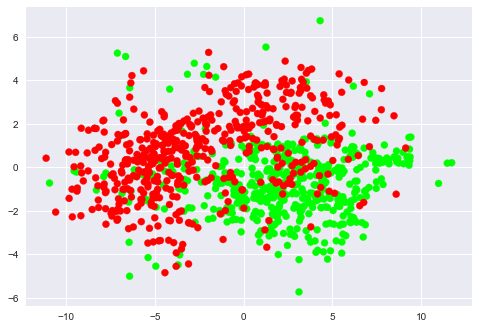

In [22]:
model = MSTClustering(cutoff_scale=.4, approximate=False)
labels = model.fit_predict(projected)
plt.scatter(projected[:, 0], projected[:, 1], c=colors, cmap='rainbow')
plt.show()

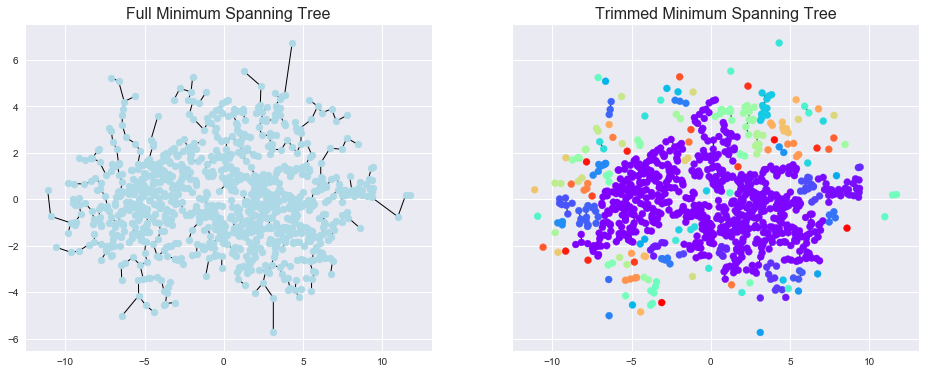

In [23]:
plot_mst(model)
plt.show()